In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df['Pregnancies']=df['Pregnancies'].astype(float)
df['Glucose']=df['Glucose'].astype(float)
df['BloodPressure']=df['BloodPressure'].astype(float)
df['SkinThickness']=df['SkinThickness'].astype(float)
df['Insulin']=df['Insulin'].astype(float)
df['Age']=df['Age'].astype(float)
df['Outcome']=df['Outcome'].astype(float)

In [12]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [13]:
# Regression
X = df.iloc[:, 1:2].values
y=df['BMI']

# Classification

# X = df.drop['Outcome']
# y=df['Outcome']

In [15]:
X

array([[148.],
       [ 85.],
       [183.],
       [ 89.],
       [137.],
       [116.],
       [ 78.],
       [115.],
       [197.],
       [125.],
       [110.],
       [168.],
       [139.],
       [189.],
       [166.],
       [100.],
       [118.],
       [107.],
       [103.],
       [115.],
       [126.],
       [ 99.],
       [196.],
       [119.],
       [143.],
       [125.],
       [147.],
       [ 97.],
       [145.],
       [117.],
       [109.],
       [158.],
       [ 88.],
       [ 92.],
       [122.],
       [103.],
       [138.],
       [102.],
       [ 90.],
       [111.],
       [180.],
       [133.],
       [106.],
       [171.],
       [159.],
       [180.],
       [146.],
       [ 71.],
       [103.],
       [105.],
       [103.],
       [101.],
       [ 88.],
       [176.],
       [150.],
       [ 73.],
       [187.],
       [100.],
       [146.],
       [105.],
       [ 84.],
       [133.],
       [ 44.],
       [141.],
       [114.],
       [ 99.],
       [10

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, Y_train)

LinearRegression()

In [18]:
print(f'a0 = {linearreg.intercept_}')
print(f'a1 = {linearreg.coef_}')
# calculating coefficients a0 and a1

a0 = 25.964522456948888
a1 = [0.04986957]


In [19]:
y_pred = linearreg.predict(X_test)

In [20]:
y_pred
Y_test

668    34.0
324    35.7
624    30.8
690    24.6
473    29.9
       ... 
554    36.9
319    23.5
594    33.6
6      31.0
615    25.8
Name: BMI, Length: 192, dtype: float64

In [4]:
plt.scatter(X_train, Y_train, color='Red')
plt.plot(X_train, linearreg.predict(X_train), color='Black')
plt.title('TV VS Sales to Study (On Test Data)')
plt.xlabel('TV Data')
plt.ylabel('Sales')
plt.show()

NameError: name 'plt' is not defined

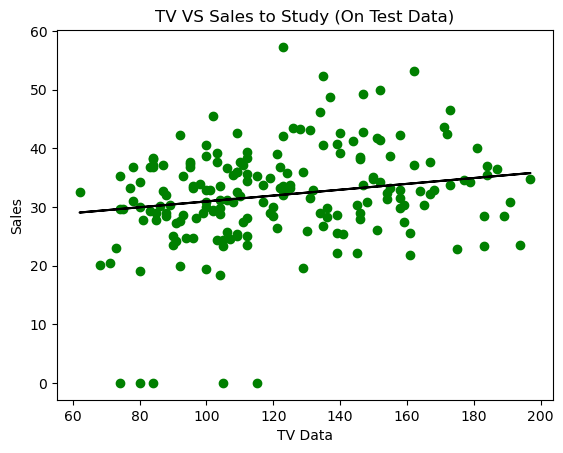

In [22]:
plt.scatter(X_test, Y_test, color='Green')
plt.plot(X_test, linearreg.predict(X_test), color='Black')
plt.title('TV VS Sales to Study (On Test Data)')
plt.xlabel('TV Data')
plt.ylabel('Sales')
plt.show()

In [23]:
from sklearn import metrics
r_square = metrics.r2_score(Y_test, y_pred)
print('r_square/ coefficient of determination: ', r_square)

mean_square_error = metrics.mean_squared_error(Y_test, y_pred)
print('mean_square_error: ', mean_square_error)

rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
print('rmse: ', rmse)

mean_absolute_error = metrics.mean_absolute_error(Y_test, y_pred)
print('mean_absolute_error: ', mean_absolute_error)


r_square/ coefficient of determination:  0.058608407996420975
mean_square_error:  69.9674591513035
rmse:  8.364655351615122
mean_absolute_error:  5.993295081647017


In [24]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted':
y_pred})
rss = np.sum(np.square(df['Predicted']-df['Actual']))
print('rss: ', rss)

rss:  13433.752157050272
